# Linear Regression with Statsmodels for Movie Revenue

- 09/12/23

## Activity: Create a Linear Regression Model with Statsmodels for Revenue

- Today we will be working with JUST the data data from the TMDB API for years 2000-2021. 
    - We will prepare the data for modeling
        - Some feature engineering
        - Our usual Preprocessing
        - New steps for statsmodels!
    - We will fit a statsmodels linear regression.
    - We will inspect the model summary.
    - We will create the visualizations to check assumptions about the residuals.



- Next class we will continue this activity.
    - We will better check all 4 assumptions.
    - We will discuss tactics for dealing with violations of the assumptions. 
    - We will use our coefficients to make stakeholder recommendations.

### Concepts Demonstrated

- [ ] Using `glob` for loading in all final files. 
- [ ] Statsmodels OLS
- [ ] QQ-Plot
- [ ] Residual Plot

# Loading the Data

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

# Set global scikit-learn configuration 
from sklearn import set_config

# Display estimators as a diagram
set_config(display='diagram')

In [2]:
pd.set_option('display.max_columns',100)

### 📚 Finding & Loading Batches of Files with `glob`

In [3]:
## Checking what data we already have in our Data folder using os.listdir
import os
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.DS_Store',
 '.ipynb_checkpoints',
 '2010-2021',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_api_results_2003.json',
 'tmdb_api_results_2004.json',
 'tmdb_api_results_2005.json',
 'tmdb_api_results_2006.json',
 'tmdb_api_results_2007.json',
 'tmdb_api_results_2008.json',
 'tmdb_api_results_2009.json',
 'tmdb_api_results_2010.json',
 'tmdb_api_results_2011.json',
 'tmdb_api_results_2012.json',
 'tmdb_api_results_2013.json',
 'tmdb_api_results_2014.json',
 'tmdb_api_results_2015.json',
 'tmdb_a

In [5]:
## Try loading in the first .csv.gz file from the list
#pd.read_csv(file_list[2])

> Why isn't it working?

In [6]:
## let's check the filepath 
file_list[4]

'final_tmdb_data_2000.csv.gz'

In [7]:
## add the folder plus filename
FOLDER + file_list[4]

'Data/final_tmdb_data_2000.csv.gz'

In [8]:
## try read csv with folder plus filename
pd.read_csv(FOLDER + file_list[4])

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,tt6174238,0.0,NaN,"{'id': 404302, 'name': 'Cold War Collection', ...",0.0,"[{'id': 80, 'name': 'Crime'}]",NaN,223878.0,en,Cold War,"Since the death of his wife three years ago, K...",0.913,/4p58ILmqsfPGS9iRCX3riekJt8e.jpg,[],"[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-06-17,0.0,0.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Cold War,0.0,2.0,2.0,NaN
1194,tt7029820,0.0,NaN,NaN,0.0,[],NaN,604889.0,en,Scream For Christmas,A Christmas party is interrupted by a violent ...,0.600,NaN,[],[],NaN,0.0,80.0,[],Released,NaN,Scream For Christmas,0.0,0.0,0.0,NaN
1195,tt7197642,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,872676.0,en,"Goodbye, Merry-Go-Round",Maryland comedy,0.600,NaN,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-12-12,0.0,90.0,[],Released,NaN,"Goodbye, Merry-Go-Round",0.0,0.0,0.0,NaN
1196,tt7631368,0.0,/sF0gUHE0YzZNXYugTB2LFxJIppf.jpg,NaN,10000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,97186.0,fr,"I, Vampire",A sensual trilogy of vampire stories from Wiza...,0.987,/cl47LE7zYELjTzH7gfyvzBrCG5W.jpg,[],[],2000-10-17,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,"I, Vampire",0.0,6.4,4.0,NR


- Now we could do that in a loop, and we would only want to open .csv.gzs.
- But there is a better way!
>- Introducing `glob`
    - Glob takes a filepath/query and will find every filename that matches the pattern provided.
    - We use asterisks as wildcards in our query.
    


In [9]:
import glob
## Make a filepath query
q = FOLDER+"*.csv.gz"
print(q)

Data/*.csv.gz


In [10]:
# Use glob.glob to get COMPLETE filepaths
file_list = glob.glob(q)
file_list

['Data/final_tmdb_data_2006.csv.gz',
 'Data/title_basics_cleaned.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/title_ratings_cleaned.csv.gz',
 'Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/combined_tmdb_data.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/title_akas_cleaned.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz']

In [11]:
# Use glob.glob to get COMPLETE filepaths and sort
q = FOLDER+"final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data/final_*.csv.gz


['Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz']

> But where are the rest of the years?

In [12]:
## in a sub-folder
sorted(os.listdir(FOLDER+"2010-2021"))

['final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz']

- Recursive Searching with glob.
    - add a `**/` in the middle of your query to grab any matches from all subfolders. 

In [13]:
# Use glob.glob to get COMPLETE filepaths
q = FOLDER+"/**/final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q,recursive = True))
file_list

Data//**/final_*.csv.gz


['Data/2010-2021/final_tmdb_data_2010.csv.gz',
 'Data/2010-2021/final_tmdb_data_2011.csv.gz',
 'Data/2010-2021/final_tmdb_data_2012.csv.gz',
 'Data/2010-2021/final_tmdb_data_2013.csv.gz',
 'Data/2010-2021/final_tmdb_data_2014.csv.gz',
 'Data/2010-2021/final_tmdb_data_2015.csv.gz',
 'Data/2010-2021/final_tmdb_data_2016.csv.gz',
 'Data/2010-2021/final_tmdb_data_2017.csv.gz',
 'Data/2010-2021/final_tmdb_data_2018.csv.gz',
 'Data/2010-2021/final_tmdb_data_2019.csv.gz',
 'Data/2010-2021/final_tmdb_data_2020.csv.gz',
 'Data/2010-2021/final_tmdb_data_2021.csv.gz',
 'Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz',
 'Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz']

In [15]:
# ## use a list comprehension to load in all files into 1 dataframe
# df = pd.concat([pd.read_csv(f) for f in file_list])
# df.head()

- Dealing with ParserErrors with "possibly malformed files"

    - for a reason I do not fully understand yet, some of the files I downloaded error if I try to read them.
        - "ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.`
    - After some googling, the fix was to add `lineterminator='\n'` to pd.read_csv


In [16]:
# ## use a list comprehension to load in all files into 1 dataframe
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in file_list])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN


In [18]:
# remove ids that are 0
df = df.loc[df['imdb_id']!='0']
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
5,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,119.168,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,tt7661128,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,595306.0,en,Cold by Nature,"Caleb Bodine and his mother Rachel, ardent ani...",0.600,NaN,"[{'id': 117146, 'logo_path': None, 'name': 'JE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-09-01,250000.0,77.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Cold by Nature,0.0,0.0,0.0,PG-13
2351,tt7786614,0.0,NaN,NaN,0.0,[],NaN,616643.0,en,Ci qing,"""Tattoo is like a film noir situated on a diff...",0.600,/pWtd3CS2VrfGPJvuH19swbGA5Wy.jpg,[],[],2009-01-01,0.0,100.0,[],Released,NaN,Tattoo,0.0,5.0,1.0,NaN
2352,tt8170758,0.0,NaN,NaN,0.0,[],NaN,513464.0,en,The Swell Season: One Step Away,"Recorded at the Riverside Theater, Milwaukee, ...",0.600,/zhxe5IA0LQljYQFv9RPqHpr5smH.jpg,[],[],2009-10-27,0.0,61.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Swell Season: One Step Away,0.0,0.0,0.0,NR
2353,tt9330112,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,Shiva gets nostalgic thinking about his colleg...,1.201,/nGOWnsmpn0LgZuCyBDXdZOIYIiA.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2009-09-04,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN


In [19]:
# reset index
df = df.reset_index(drop = True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
1,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
2,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
3,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
4,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,119.168,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG


In [20]:
## saving the combined csv to disk
df.to_csv(FOLDER+'combined_tmdb_data.csv.gz', compression = 'gzip', index = False)

df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz', lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,"Dave, a young photon, who is forced out of the...",2.769,/wflqNWF3BCwWJABjIbGWeM9hKHP.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-12-02,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
1,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,Marcus (Philip WInchester) wakes up in the mid...,6.120,/sv9o6VYUQM2AbfmlTwDTn9238R5.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-04-23,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
2,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,"Awakening from a near fatal overdose, Chris em...",0.600,/xMMehQD3VWgorYoqvlTeQXSbsFo.jpg,[],[],2010-01-01,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
3,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,"Nick Anderson, Kevin Daniels, and Tracey Green...",2.418,/zBFUv1EjHqLaDI38sgaBoEnhepL.jpg,"[{'id': 46102, 'logo_path': None, 'name': 'Ill...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-05-20,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
4,tt0398286,0.0,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,en,Tangled,When the kingdom's most wanted-and most charmi...,119.168,/ym7Kst6a4uodryxqbGOxmewF235.jpg,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,592461732.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They're taking adventure to new lengths.,Tangled,0.0,7.6,9364.0,PG


# Preprocessing

## Feature Engineering


- Belongs to Collection: convert to boolean
- Genres: get just the name and manually OHE
- Cleaning Categories in Certification
- Converting release date to year, month, and day.

In [21]:
## Columns to exclude
drop_cols = ['backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0312305,0.0,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN
1,tt0326965,0.0,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13
2,tt0331312,0.0,NaN,0.0,[],0.600,2010-01-01,0.0,0.0,This Wretched Life,5.0,1.0,NaN
3,tt0393049,0.0,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",2.418,2010-05-20,0.0,98.0,Anderson's Cross,4.0,5.0,NaN
4,tt0398286,0.0,NaN,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",119.168,2010-11-24,592461732.0,100.0,Tangled,7.6,9364.0,PG


### belongs to collection

In [22]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].notna().sum()

3738

In [23]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    56392
True      3738
Name: belongs_to_collection, dtype: int64

### genre

In [24]:
# View a test case for genres
df['genres'][0]

"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id': 878, 'name': 'Science Fiction'}]"

In [25]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'", '"')
    x = json.loads(x)

    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [27]:
## Use our function on our test case
get_genre_name(df.loc[0, 'genres'])

['Family', 'Animation', 'Science Fiction']

In [28]:
## Use our function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,Family
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,Animation
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,Science Fiction
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,Thriller
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,Mystery


In [29]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Family', 'Animation', 'Science Fiction', 'Thriller', 'Mystery',
       'Drama', 'Romance', 'Comedy', 'War', 'Crime', 'Action',
       'Adventure', 'Horror', 'Fantasy', 'History', 'Western', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [30]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f'Genre_{genre}'] = df['genres'].str.contains(genre, regex = False)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
0,tt0312305,0.0,False,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,"[Family, Animation, Science Fiction]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0326965,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,"[Thriller, Mystery, Drama]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0331312,0.0,False,0.0,[],0.600,2010-01-01,0.0,0.0,This Wretched Life,5.0,1.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0393049,0.0,False,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",2.418,2010-05-20,0.0,98.0,Anderson's Cross,4.0,5.0,NaN,"[Romance, Comedy, Drama]",False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
4,tt0398286,0.0,False,260000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",119.168,2010-11-24,592461732.0,100.0,Tangled,7.6,9364.0,PG,"[Animation, Family]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt7661128,0.0,False,0.0,"[{'id': 53, 'name': 'Thriller'}]",0.600,2009-09-01,250000.0,77.0,Cold by Nature,0.0,0.0,PG-13,[Thriller],False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60126,tt7786614,0.0,False,0.0,[],0.600,2009-01-01,0.0,100.0,Tattoo,5.0,1.0,NaN,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60127,tt8170758,0.0,False,0.0,[],0.600,2009-10-27,0.0,61.0,The Swell Season: One Step Away,0.0,0.0,NR,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60128,tt9330112,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1.201,2009-09-04,0.0,145.0,Ninaithale Inikkum,4.0,1.0,NaN,"[Drama, Thriller, Mystery]",False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
## Drop original genre cols
df = df.drop(columns=['genres', 'genres_list'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
0,tt0312305,0.0,False,0.0,2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0326965,0.0,False,0.0,6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0331312,0.0,False,0.0,0.600,2010-01-01,0.0,0.0,This Wretched Life,5.0,1.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0393049,0.0,False,300000.0,2.418,2010-05-20,0.0,98.0,Anderson's Cross,4.0,5.0,NaN,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
4,tt0398286,0.0,False,260000000.0,119.168,2010-11-24,592461732.0,100.0,Tangled,7.6,9364.0,PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### certification

In [32]:
## Checking Certification values counts
df['certification'].value_counts(dropna = False)

NaN                                45506
R                                   6097
NR                                  3261
PG-13                               3224
PG                                  1432
G                                    442
NC-17                                156
Unrated                                5
R                                      1
PG-13                                  1
10                                     1
-                                      1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
Name: certification, dtype: int64

In [33]:
# fix extra space certs
df['certification'] = df['certification'].str.strip()

In [34]:
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      45507
R         6098
NR        3270
PG-13     3225
PG        1432
G          442
NC-17      156
Name: certification, dtype: int64

### Converting year to sep features

In [35]:
## view value_counts()
df['release_date'].value_counts()

2009-01-01    265
2010-01-01    244
2008-01-01    232
2011-01-01    209
2012-01-01    187
             ... 
2022-04-27      1
2022-05-26      1
2022-01-31      1
2022-03-21      1
2007-08-11      1
Name: release_date, Length: 7633, dtype: int64

In [36]:
## split release date into 3 columns
new_cols = ['year', 'month', 'day']
df[new_cols] = df['release_date'].str.split('-', expand = True)
df[new_cols] = df[new_cols].astype(float)
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
0,tt0312305,0.0,False,0.0,2.769,2012-12-02,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0
1,tt0326965,0.0,False,0.0,6.120,2010-04-23,0.0,90.0,In My Sleep,5.5,31.0,PG-13,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0
2,tt0331312,0.0,False,0.0,0.600,2010-01-01,0.0,0.0,This Wretched Life,5.0,1.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,1.0,1.0
3,tt0393049,0.0,False,300000.0,2.418,2010-05-20,0.0,98.0,Anderson's Cross,4.0,5.0,NaN,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0
4,tt0398286,0.0,False,260000000.0,119.168,2010-11-24,592461732.0,100.0,Tangled,7.6,9364.0,PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0


In [37]:
## drop original feature
df = df.drop(columns = ['release_date'])

In [38]:
# View head of data
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
0,tt0312305,0.0,False,0.0,2.769,0.0,45.0,Quantum Quest: A Cassini Space Odyssey,8.4,7.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2012.0,12.0,2.0
1,tt0326965,0.0,False,0.0,6.120,0.0,90.0,In My Sleep,5.5,31.0,PG-13,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,4.0,23.0
2,tt0331312,0.0,False,0.0,0.600,0.0,0.0,This Wretched Life,5.0,1.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,1.0,1.0
3,tt0393049,0.0,False,300000.0,2.418,0.0,98.0,Anderson's Cross,4.0,5.0,NaN,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,2010.0,5.0,20.0
4,tt0398286,0.0,False,260000000.0,119.168,592461732.0,100.0,Tangled,7.6,9364.0,PG,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010.0,11.0,24.0


## Train Test Split

In [39]:
# View info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60130 entries, 0 to 60129
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   belongs_to_collection  60130 non-null  bool   
 3   budget                 60130 non-null  float64
 4   popularity             60130 non-null  float64
 5   revenue                60130 non-null  float64
 6   runtime                59298 non-null  float64
 7   title                  60130 non-null  object 
 8   vote_average           60130 non-null  float64
 9   vote_count             60130 non-null  float64
 10  certification          14623 non-null  object 
 11  Genre_Family           60130 non-null  bool   
 12  Genre_Animation        60130 non-null  bool   
 13  Genre_Science Fiction  60130 non-null  bool   
 14  Genre_Thriller         60130 non-null  bool   
 15  Ge

In [40]:
## Make x and y variables
drop_for_model = ['title','imdb_id']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie,year,month,day
9538,0.0,False,0.0,1.113,80.0,5.3,5.0,NaN,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,2013.0,10.0,1.0
16553,0.0,False,0.0,1.875,92.0,6.0,2.0,NaN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2015.0,4.0,15.0
34106,0.0,False,0.0,1.499,101.0,2.0,1.0,R,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2020.0,11.0,4.0
3804,0.0,False,0.0,1.506,100.0,7.7,3.0,PG,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,2011.0,9.0,24.0
37747,0.0,False,300000.0,0.600,138.0,5.0,2.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2020.0,9.0,18.0


In [41]:
# Sum up NAs
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                    638
vote_average                 0
vote_count                   0
certification            34082
Genre_Family                 0
Genre_Animation              0
Genre_Science Fiction        0
Genre_Thriller               0
Genre_Mystery                0
Genre_Drama                  0
Genre_Romance                0
Genre_Comedy                 0
Genre_War                    0
Genre_Crime                  0
Genre_Action                 0
Genre_Adventure              0
Genre_Horror                 0
Genre_Fantasy                0
Genre_History                0
Genre_Western                0
Genre_Music                  0
Genre_Documentary            0
Genre_TV Movie               0
year                       792
month                      792
day                        792
dtype: int64

In [42]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [43]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Family',
 'Genre_Animation',
 'Genre_Science Fiction',
 'Genre_Thriller',
 'Genre_Mystery',
 'Genre_Drama',
 'Genre_Romance',
 'Genre_Comedy',
 'Genre_War',
 'Genre_Crime',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Horror',
 'Genre_Fantasy',
 'Genre_History',
 'Genre_Western',
 'Genre_Music',
 'Genre_Documentary',
 'Genre_TV Movie']

In [44]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [45]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [46]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols),
                                       ('passthrough',already_ohe_cols))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', '...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Family',
                                  'Genre_Animation', 'Genre_Science Fiction',
                                  'Genre_Thriller', 'Genre_Mystery',
                                  'Genre_Drama', 'Genre_Romance',
                                  'Genre_Comedy', 'Genre_War', 'Genre_Crime',
                                  'Genre_Action', 'Genre_Adventure',
                                  'Genre_Horror', 'Genre_Fantasy',
                                  'Genre_History', 'Genre_Western',
                                  'Genre_Music', 'Genre_Documentary',
                                  'Genre_TV Movie'])])

In [47]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

/usr/local/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False))])

In [48]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_cols)

## Create the empty list
final_features = [*cat_features,*num_cols,*already_ohe_cols]
len(final_features)

36

In [49]:
## checking shape matches len final features
preprocessor.transform(X_train).shape

(45097, 36)

In [50]:
## make X_train_tf 
X_train_tf = pd.DataFrame(preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
9538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.113,80.0,5.3,5.0,2013.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16553,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.875,92.0,6.0,2.0,2015.0,4.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.499,101.0,2.0,1.0,2020.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3804,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.506,100.0,7.7,3.0,2011.0,9.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,300000.0,0.600,138.0,5.0,2.0,2020.0,9.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
## make X_test_tf 
X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
19252,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1.422,70.0,0.0,0.0,2015.0,12.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40663,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.180,99.0,7.0,4.0,2021.0,11.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.285,0.0,6.4,16.0,2019.0,8.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.052,90.0,5.0,4.0,2010.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44055,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26000000.0,16.946,126.0,7.4,1011.0,2021.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Adding a Constant for Statsmodels

In [52]:
##import statsmodels correctly
import statsmodels.api as sm

> Tip: make sure that add_constant actually added a new column! You may need to change the parameter `has_constant` to "add"

In [53]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=True)
X_test_df = sm.add_constant(X_test_tf, prepend=True)
display(X_train_df.head(2),X_test_df.head(2))

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
9538,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.113,80.0,5.3,5.0,2013.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16553,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.875,92.0,6.0,2.0,2015.0,4.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Family,Genre_Animation,Genre_Science Fiction,Genre_Thriller,Genre_Mystery,Genre_Drama,Genre_Romance,Genre_Comedy,Genre_War,Genre_Crime,Genre_Action,Genre_Adventure,Genre_Horror,Genre_Fantasy,Genre_History,Genre_Western,Genre_Music,Genre_Documentary,Genre_TV Movie
19252,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1.422,70.0,0.0,0.0,2015.0,12.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40663,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.180,99.0,7.0,4.0,2021.0,11.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

## Statsmodels OLS

In [54]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3972.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:27:36   Log-Likelihood:            -8.4213e+05
No. Observations:               45097   AIC:                         1.684e+06
Df Residuals:                   45061   BIC:                         1.685e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.674e+07   4.65e+07     -1.005      0.315   -1.38e+08    4.44e+07
certification_G       -5.295e+06   6.82e+06     -0.776      0.438   -1.87e+07    8.08e+06
certification_MISSING -2.089e+06    6.7e+06     -0.312      0.755   -1.52e+07     1.1e+07
certification_NC-17   -6.958e+06   7.13e+06     -0.976      0.329   -2.09e+07    7.01e+06
certification_NR       -3.31e+06   6.72e+06     -0.492      0.622   -1.65e+07    9.87e+06
certification_PG      -1.681e+06    6.7e+06     -0.251      0.802   -1.48e+07    1.15e+07
certification_PG-13   -1.082e+07   6.67e+06     -1.623      0.105   -2.39e+07    2.25e+06
certification_R       -1.659e+07   6.64e+06     -2.500      0.012   -2.96e+07   -3.58e+06
adult                  1.371e+06   3.64e+06      0.376      0.707   -5.77e+06    8.51e+06
budget                    1.5448      0.014    110.732      0.000       1.517       1.572
popularity             1.419e+05   4441.421     31.954      0.000    1.33e+05    1.51e+05
runtime               -6249.4768   5192.945     -1.203      0.229   -1.64e+04    3928.782
vote_average          -4.954e+05   6.07e+04     -8.155      0.000   -6.14e+05   -3.76e+05
vote_count             2.895e+04    198.629    145.762      0.000    2.86e+04    2.93e+04
year                    2.57e+04   2.64e+04      0.972      0.331   -2.61e+04    7.75e+04
month                 -8.267e+04    4.2e+04     -1.968      0.049   -1.65e+05    -335.885
day                   -1.436e+04   1.62e+04     -0.886      0.376   -4.61e+04    1.74e+04
belongs_to_collection  1.158e+07   6.56e+05     17.642      0.000    1.03e+07    1.29e+07
Genre_Family           -1.38e+06   7.42e+05     -1.859      0.063   -2.83e+06    7.49e+04
Genre_Animation        4.821e+05    9.2e+05      0.524      0.600   -1.32e+06    2.29e+06
Genre_Science Fiction -5.211e+06   6.74e+05     -7.730      0.000   -6.53e+06   -3.89e+06
Genre_Thriller        -1.327e+06   4.29e+05     -3.095      0.002   -2.17e+06   -4.86e+05
Genre_Mystery         -2.097e+06   6.88e+05     -3.046      0.002   -3.45e+06   -7.48e+05
Genre_Drama           -3.558e+05   3.37e+05     -1.054      0.292   -1.02e+06    3.06e+05
Genre_Romance           2.86e+04   4.59e+05      0.062      0.950   -8.72e+05    9.29e+05
Genre_Comedy          -3.946e+05   3.62e+05     -1.091      0.275    -1.1e+06    3.14e+05
Genre_War             -1.922e+06   1.23e+06     -1.559      0.119   -4.34e+06    4.95e+05
Genre_Crime           -2.812e+06   5.87e+05     -4.792      0.000   -3.96e+06   -1.66e+06
Genre_Action          -1.452e+06   5.04e+05     -2.880      0.004   -2.44e+06   -4.64e+05
Genre_Adventure        2.352e+06   7.41e+05      3.174      0.002       9e+05    3.81e+06
Genre_Horror          -5.668e+04   4.57e+05     -0.124      0.901   -9.53e+05     8.4e+05
Genre_Fantasy         -

In [55]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.755
Testing R^2: 0.756


# The Assumptions of Linear Regression

- The 4 Assumptions of a Linear Regression are:
    - Linearity: That the input features have a linear relationship with the target.
    - Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
    - **Normality: The model's residuals are approximately normally distributed.**
    - **Homoscedasticity: The model residuals have equal variance across all predictions.**


### QQ-Plot for Checking for Normality

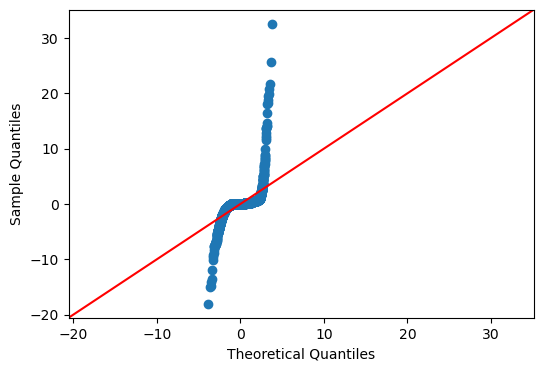

In [56]:
## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

### Residual Plot for Checking Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

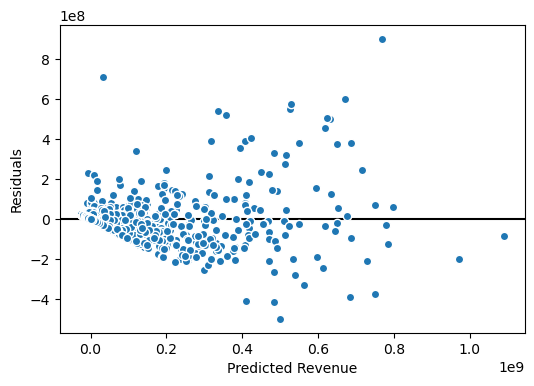

In [57]:
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

### Putting it all together

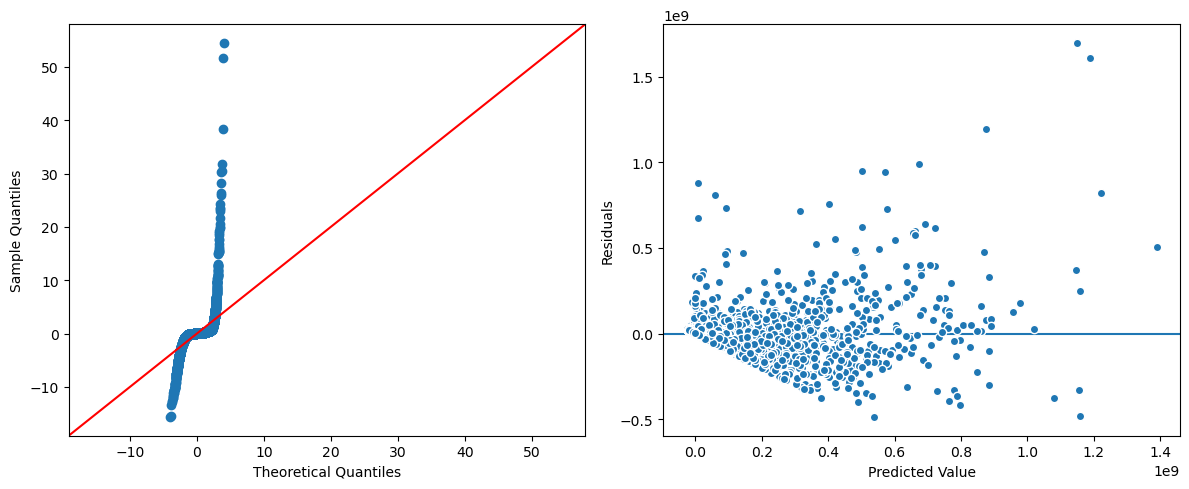

In [58]:
# Function to plot qq plot and residual plot
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)

### Next class: iterating on our model & interpreting coefficients